In [ ]:
#@title Question 4 Game we created in class
import random


class Card:
    SUITS = ["♣", "♦", "♥", "♠"]
    RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]

    def __init__(self, rank, suit):
        if rank not in self.RANKS:
            raise Exception(f"Invalid rank, must be one of {self.RANKS}")
        if suit not in self.SUITS:  # Corrected check to validate suit
            raise Exception(f"Invalid suit, must be one of {self.SUITS}")
        self._rank = rank
        self._suit = suit

    def __gt__(self, other):
        return self.RANKS.index(self.rank) > self.RANKS.index(other.rank)

    def __eq__(self, other):
        return self.rank == other.rank

    @property
    def suit(self):
        return self._suit

    @property
    def rank(self):
        return self._rank

    def __str__(self):
        return f"{self.rank}{self.suit}"

    def __repr__(self):
        return self.__str__()


class Deck:
    def __init__(self):
        cards = []
        for rank in Card.RANKS:
            for suit in Card.SUITS:
                card = Card(rank, suit)
                cards.append(card)
        self._cards = tuple(cards)

    @property
    def cards(self):
        return self._cards

    def __str__(self):
        return str(self.cards)

    def shuffle(self):
        cards = list(self.cards)
        random.shuffle(cards)
        self._cards = tuple(cards)


d = Deck()
print(d)
d.shuffle()
print(d)


class Hand:
    def __init__(self, deck):
        cards = []
        for i in range(5):
            cards.append(deck.cards[i])
            self._cards = tuple(cards)

    def __str__(self):
        return str(self._cards)

    @property
    def cards(self):
        return self._cards

    @property
    def is_flush(self):
        suit = self._cards[0].suit
        for i in range(1, 5):
            if self._cards[i].suit != suit:
                return False
        return True

    @property
    def is_pair(self):
        ranks = []
        for card in self.cards:
            ranks.append(card.rank)
        for rank in ranks:
            if ranks.count(rank) == 2:
                return True
        return False

    @property
    def is_3_kind(self):
        ranks = []
        for card in self.cards:
            ranks.append(card.rank)
        for rank in ranks:
            if ranks.count(rank) == 3:
                return True
        return False

    @property
    def is_4_kind(self):
        ranks = []
        for card in self.cards:
            ranks.append(card.rank)
        for rank in ranks:
            if ranks.count(rank) == 4:
                return True
        return False

    @property
    def is_full_house(self):
        return self.is_3_kind and self.is_pair

    @property
    def is_2_pair(self):
        ranks = []
        for card in self.cards:
            ranks.append(card.rank)
        ranks = set(ranks)
        return len(ranks) == 3 and not self.is_3_kind

    def sort_hand(self):
        cards = list(self.cards)
        cards.sort()
        print(f"sorted hand is {cards}")

    @property
    def is_straight(self):
        cards = list(self.cards)
        cards.sort()
        distance = cards[4].RANKS.index(cards[4].rank) - cards[0].RANKS.index(cards[0].rank)
        return distance == 4 and not self.is_pair and not self.is_3_kind


precision = tries = 100
ie = 0
while True:
    ie = ie + 1
    d = Deck()
    d.shuffle()
    hand = Hand(d)
    if hand.is_straight:
        tries -= 1

    if tries == 0:
        break

probability = precision/ie * 100
print(f"The odds of getting of a straight are {probability}%")


(2♣, 2♦, 2♥, 2♠, 3♣, 3♦, 3♥, 3♠, 4♣, 4♦, 4♥, 4♠, 5♣, 5♦, 5♥, 5♠, 6♣, 6♦, 6♥, 6♠, 7♣, 7♦, 7♥, 7♠, 8♣, 8♦, 8♥, 8♠, 9♣, 9♦, 9♥, 9♠, 10♣, 10♦, 10♥, 10♠, J♣, J♦, J♥, J♠, Q♣, Q♦, Q♥, Q♠, K♣, K♦, K♥, K♠, A♣, A♦, A♥, A♠)
(10♠, 10♦, 5♠, K♣, 8♠, 5♣, K♠, 8♥, 10♣, 9♥, 9♠, K♦, 9♣, 7♥, 7♣, A♣, Q♣, J♠, 4♣, 2♥, 4♦, 3♠, 2♦, 2♣, 5♦, 2♠, 6♦, 4♠, A♠, 10♥, 3♣, 4♥, 9♦, 6♣, 8♣, Q♦, Q♠, 8♦, A♥, 6♥, 6♠, 7♦, A♦, K♥, 5♥, Q♥, 3♦, J♦, 3♥, J♣, 7♠, J♥)
The odds of getting of a straight are 0.3540324293705303%


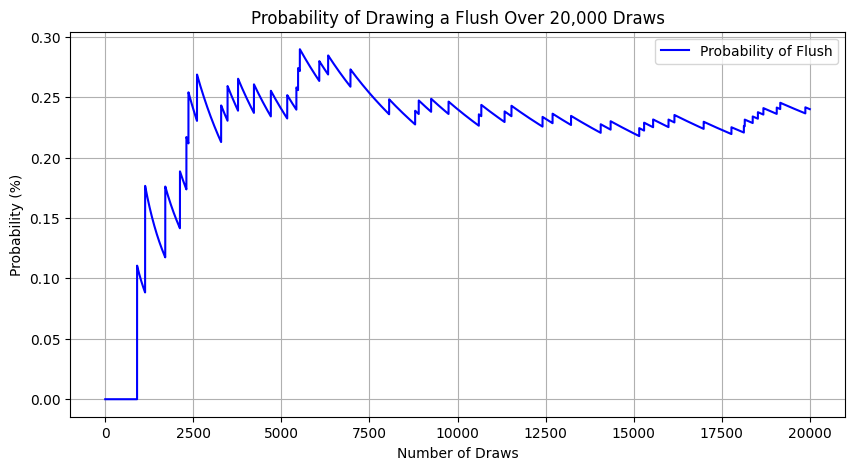

The final computed probability of drawing a Flush is 0.24%


In [ ]:
#@title Question 4 New Poker Game
#Each modifaction was marked by #Change in the new code, with a short explanation of what I did

import random
import matplotlib.pyplot as plt

class Card:
    SUITS = ["♣", "♦", "♥", "♠"]
    RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]

    def __init__(self, rank, suit):
        if rank not in self.RANKS:
            raise Exception(f"Invalid rank, must be one of {self.RANKS}")
        if suit not in self.SUITS:
            raise Exception(f"Invalid suit, must be one of {self.SUITS}")
        self._rank = rank
        self._suit = suit

    def __str__(self):
        return f"{self.rank}{self.suit}"

    @property
    def suit(self):
        return self._suit

    @property
    def rank(self):
        return self._rank

    def __repr__(self):
        return self.__str__()

class Deck:
    def __init__(self):
        # Change 1: Comprehension used to create the deck
        cards = [Card(rank, suit) for rank in Card.RANKS for suit in Card.SUITS]
        self._cards = tuple(cards)

    def shuffle(self):
        # Change 2: Improved shuffling mechanism
        self._cards = tuple(random.sample(self._cards, len(self._cards)))

class Hand:
    def __init__(self, deck):
        # Change 3: Directly assign first 5 shuffled cards to hand
        self._cards = tuple(deck._cards[:5])

    @property
    def is_flush(self):
        # Change 4: Simplified flush check
        suit = self._cards[0].suit
        return all(card.suit == suit for card in self._cards)

iterations = 20000
flush_count = 0
probabilities = []

for i in range(1, iterations + 1):
    deck = Deck()
    deck.shuffle()
    hand = Hand(deck)
    if hand.is_flush:
        flush_count += 1
    # Change 5: Track probabilities after each draw
    probabilities.append(flush_count / i * 100)

# Change 6: Plotting flush probabilities
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), probabilities, label='Probability of Flush', color='blue')
plt.title('Probability of Drawing a Flush Over 20,000 Draws')
plt.xlabel('Number of Draws')
plt.ylabel('Probability (%)')
plt.grid(True)
plt.legend()
plt.show()

# Change 7: Output the final computed probability
print(f"The final computed probability of drawing a Flush is {probabilities[-1]:.2f}%")



In [ ]:
#@title Question 5
#Calculate the minimum y value for y = x^2 + 4x + 10

import numpy as np

# Coefficients for the quadratic equation
a = 1
b = 4
c = 10

# Calculate the x-coordinate of the vertex
x_vertex = -b / (2 * a)

# Substitute x_vertex back into the equation to find the y-coordinate
y_vertex = a * x_vertex**2 + b * x_vertex + c

# Print the results
print(f"The vertex of y = x^2 + 4x + 10 occurs at x = {x_vertex}")
print(f"The minimum value of y at the vertex is {y_vertex}")

The vertex of y = x^2 + 4x + 10 occurs at x = -2.0
The minimum value of y at the vertex is 6.0


In [ ]:
#@title Question 6
#I choose the value from the second row and the third column, which corresponds to index 2 and column c.
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(4, 4), index=[1, 2, 3, 4], columns=['a', 'b', 'c', 'd'])
print(df)

#Using Index
value_index = df['c'][2]

#Using loc
value_loc = df.loc[2, 'c']

#Using iloc
value_iloc = df.iloc[1, 2]

print("\nUsing index:", value_index)
print("Using loc:", value_loc)
print("Using iloc:", value_iloc)

          a         b         c         d
1  0.173178 -0.866929 -0.317520 -1.141989
2  0.244966  0.919745 -3.381731  1.242550
3  0.042901 -0.030033 -3.104520 -2.236205
4  0.060557 -0.156830  0.223203 -0.626734

Accessed value using index and column name: -3.381731379818561
Accessed value using loc: -3.381731379818561
Accessed value using iloc: -3.381731379818561


[*********************100%%**********************]  1 of 1 completed


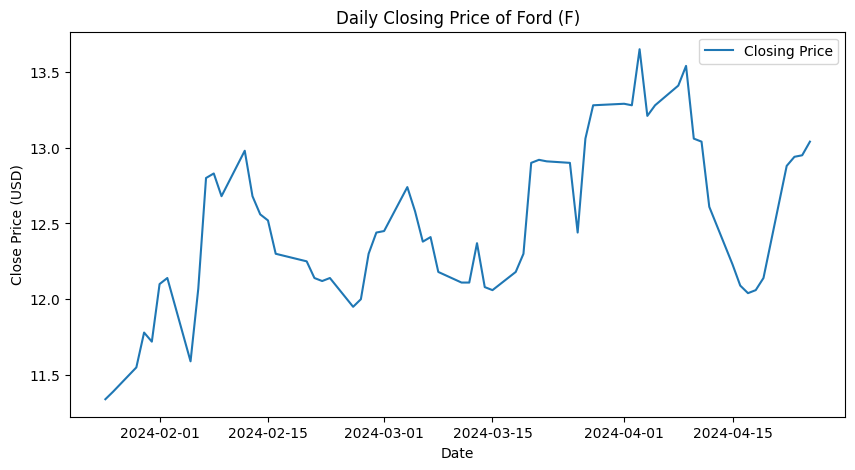

Number of rows: 64
Column names: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Highest stock value on April 11th: 13.140000343322754


In [ ]:
#@title Question 7
from matplotlib import pylab as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import yfinance as yfin
yfin.pdr_override()

today = datetime.datetime.today()
formatted_date = today.strftime("%Y-%m-%d")
df1 = web.DataReader('F', start='2024-01-25', end=formatted_date)
df1.index = pd.to_datetime(df1.index)

# 1. Number of rows
num_rows = len(df1)

# 2. Column names
column_names = df1.columns

# 3. Highest stock value
highest_value_apr11 = df1.loc['2024-04-11']['High']

# 4. Plotting "Close" column
plt.figure(figsize=(10, 5))
plt.plot(df1['Close'], label='Closing Price')
plt.title('Daily Closing Price of Ford (F)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

print(f"Number of rows: {num_rows}")
print(f"Column names: {column_names}")
print(f"Highest stock value on April 11th: {highest_value_apr11}")


In [ ]:
#@title Question 8


class Book:
    def __init__(self, title):
        self.title = title

    def __str__(self):
        return f"Book: {self.title}"

    def get_title(self):
        return self.title

#__init__: A magic method that initializes the Book instance with a title
#__str__: Another magic method that provides a string representation of the object, used by functions like print
#get_title: A regular method that returns the title of the book


In [ ]:
#@title Question 9

#import numpy as np
#a = np.arange(0, 12)
#a = a.reshape(4, 3)

#print(a)

import numpy as np

a = np.arange(0, 12)
# Reshape the array to a 4x3 matrix
a = a.reshape(4, 3)

a = a * 5 + 1

print(a)


[[ 1  6 11]
 [16 21 26]
 [31 36 41]
 [46 51 56]]
